In [ ]:
#IMPORTING LIBRARIRIES

In [ ]:
import numpy as np #numpy arrays(lists)
import pandas as pd #dataframes or structured tables
from sklearn.model_selection import train_test_split #split to train&test data
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score #evaluation of the model
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from matplotlib.cm import rainbow
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


Data Collection and processing


In [ ]:
Heart_Disease=pd.read_csv('/content/heart_disease_data.csv')

In [ ]:
#Getting First 5 Rows
Heart_Disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
Heart_Disease.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
#size of the dataset(r,c)
Heart_Disease.shape

(303, 14)

In [ ]:
Heart_Disease.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# New Section

In [ ]:
Heart_Disease.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

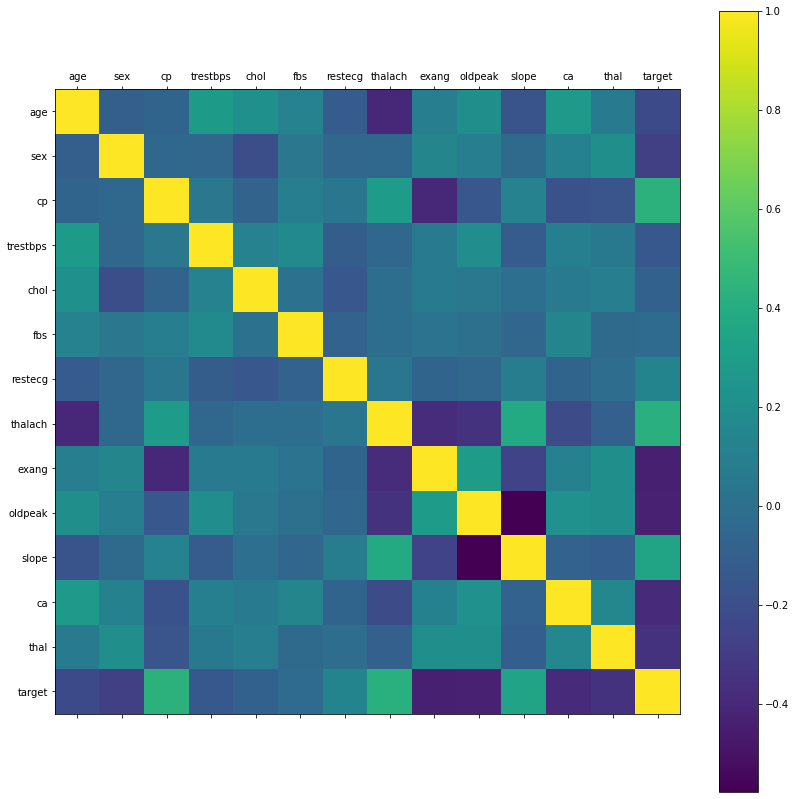

In [ ]:
# the correlation matrix of features 
rcParams['figure.figsize'] = 20, 14
plt.matshow(Heart_Disease.corr())
plt.yticks(np.arange(Heart_Disease.shape[1]), Heart_Disease.columns)
plt.xticks(np.arange(Heart_Disease.shape[1]), Heart_Disease.columns)
plt.colorbar()

there is no single feature that has a very high correlation with our target value. Also, some of the features have a negative correlation with the target value and some have positive.

In [ ]:
Heart_Disease.describe()#statistical data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
  Heart_Disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

Text(0.5, 1.0, 'Count of each Target Class')

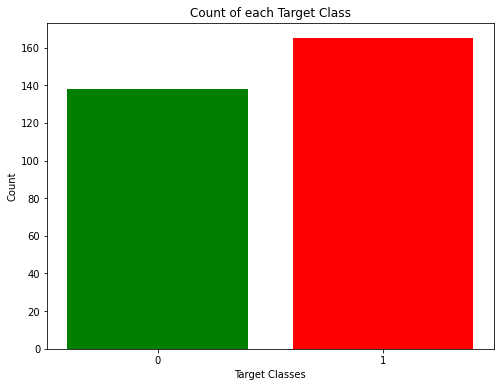

In [ ]:
rcParams['figure.figsize'] = 8,6
plt.bar(Heart_Disease['target'].unique(), Heart_Disease['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

1 : Heart Disease Positive
0 : Heart Disease Negative

In [ ]:
#Splitting features and target variable
x=Heart_Disease.drop(columns='target',axis=1)
y=Heart_Disease['target']
print(x)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [ ]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [ ]:
X_Train,X_Test,Y_Train,Y_Test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [ ]:
print(x.shape,X_Train.shape,X_Test.shape)

(303, 13) (242, 13) (61, 13)


In [ ]:
print(y.shape,Y_Train.shape,Y_Test.shape)

(303,) (242,) (61,)


TRAINING THE MODEL
LOGISTIC REGRESSION

In [ ]:
model=LogisticRegression()

In [ ]:
#TRAINING THE MODEL
model.fit(X_Train, Y_Train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
#EVALUATION OF THE MODEL BY CHECKING THE ACCURACY OF OUR MODEL : Model will be asked to predict the target and predicted value will be compared with original value.

In [ ]:
#accuracy on training data
X_Train_prediction=model.predict(X_Train)
data_accuracy=accuracy_score(X_Train_prediction,Y_Train)

In [ ]:
print('Accuracy on Test data : ', data_accuracy)

Accuracy on Test data :  0.8512396694214877


In [ ]:
#accuracy on test data
X_test_prediction=model.predict(X_Test)
data_accuracy_test=accuracy_score(X_test_prediction,Y_Test)
print("Accuracy on Test data ",data_accuracy_test)

Accuracy on Test data  0.819672131147541


In [ ]:
input_data = (63,1,3,145,233,1,0,150,0,2.3,0,0,1)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


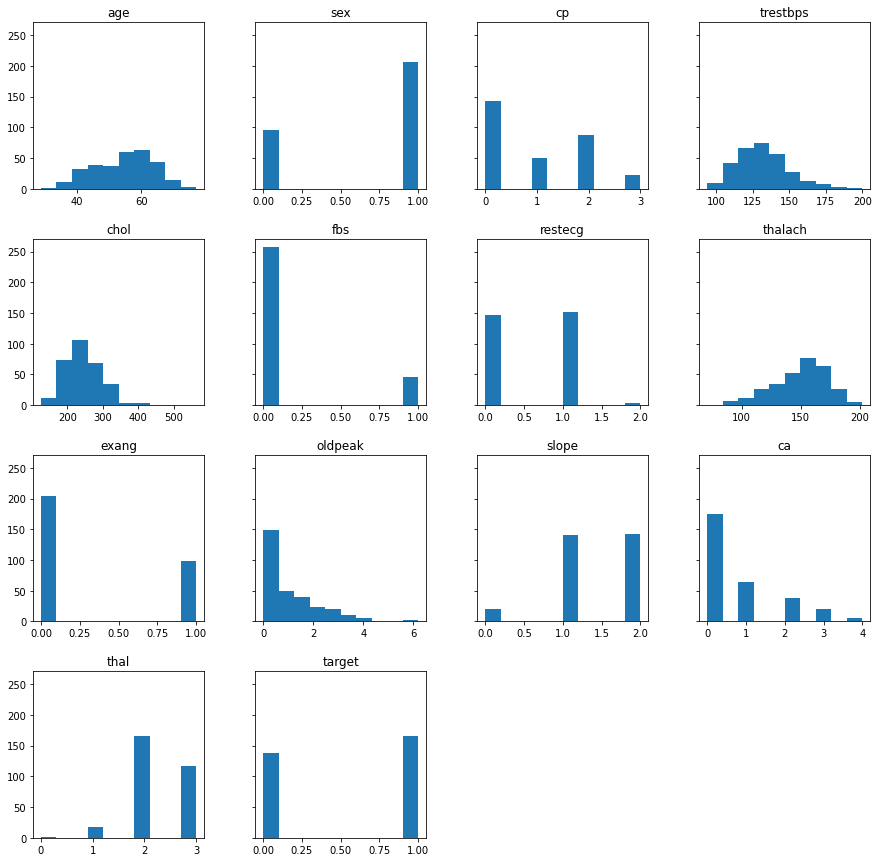

In [ ]:
#DATA ANALYSIS
Numeric_Variables=list(Heart_Disease.select_dtypes(include=['int64','float64']))
Heart_Disease[Numeric_Variables].describe().apply(lambda z:round(z,2)).T
histograms = Heart_Disease[Numeric_Variables].hist(bins =10, xlabelsize=10, ylabelsize=10, grid=False, sharey= True, figsize = (15,15)) #create the histograms


In [ ]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_Train, Y_Train)
    svc_scores.append(svc_classifier.score(X_Test, Y_Test))

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

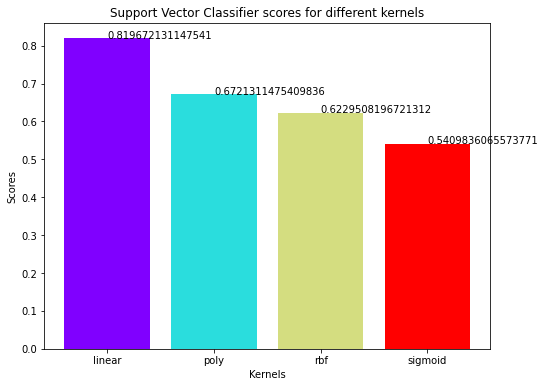